In [1]:
import os

import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib.dates as mdates

# easy distance calculator
from geopy.distance import distance

In [2]:
## Some plotting settings

## Set the font (Omnes)
font_path = './fonts/omnes/Omnes SemiBold.ttf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['font.weight'] = 'bold'


# Wolt color scheme
wolt_color_scheme = ['#467886','#D2A983','#E9CE47', '#031E54','#20C5ED',]

# Default figure size
plt.rc("figure", figsize=(8, 8))

# Set theme
sns.set_theme(style="whitegrid", font="Omnes", font_scale=1.5)

In [ ]:
# Create folder for the results (if they don't exist)

# Define the folder structure
base_folder = "results"
subfolders = ["eda", "modeling"]

# Create the base folder if it doesn't exist
if not os.path.exists(base_folder):
    os.mkdir(base_folder)

# Create the subfolders inside the base folder
for subfolder in subfolders:
    subfolder_path = os.path.join(base_folder, subfolder)
    if not os.path.exists(subfolder_path):
        os.mkdir(subfolder_path)

print("Folder structure created.")

In [3]:
# Load the data
data_path = 'data/orders.csv'
df = pd.read_csv(data_path)
# Convert the timestamp to datetime
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

df.head()

,TIMESTAMP,ON_TIME_DELIVERY,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY,ACTUAL_DELIVERY,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION
0,2020-08-01 06:07:00,-19,1,60.158,24.946,60.160,24.946,29,10,0.0,15.0,3.53644,0.0
1,2020-08-01 06:17:00,-7,8,60.163,24.927,60.153,24.910,39,32,0.0,15.0,3.53644,0.0
2,2020-08-01 06:54:00,-17,4,60.161,24.937,60.162,24.939,23,6,0.0,15.0,3.53644,0.0
3,2020-08-01 07:09:00,-2,3,60.185,24.954,60.190,24.911,28,26,0.0,16.7,3.52267,0.0
4,2020-08-01 07:10:00,-1,2,60.182,24.955,60.178,24.949,27,26,0.0,16.7,3.52267,0.0


In [4]:
# Distance calculator (based on user lat/long and venue lat/long)
def calculate_distance(row):
    user_coords = (row['USER_LAT'], row['USER_LONG'])
    venue_coords = (row['VENUE_LAT'], row['VENUE_LONG'])
    return distance(user_coords, venue_coords).km

df['DISTANCE'] = df.apply(calculate_distance, axis=1)
df.describe()

,TIMESTAMP,ON_TIME_DELIVERY,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY,ACTUAL_DELIVERY,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION,DISTANCE
count,18706,18706.000000,18706.000000,18706.000000,18706.000000,18706.000000,18706.000000,18706.000000,18706.000000,18706.000000,18706.000000,18706.000000,18706.000000,18706.000000
mean,2020-09-01 12:20:11.697851136,-1.201058,2.688228,60.175234,24.941244,60.175643,24.941214,33.809313,32.608254,11.819202,16.900631,3.791537,0.332756,1.023427
min,2020-08-01 06:07:00,-41.000000,1.000000,60.153000,24.909000,60.149000,24.878000,10.000000,6.000000,0.000000,6.100000,0.077420,0.000000,0.000000
25%,2020-08-16 19:48:00,-7.000000,1.000000,60.163000,24.926000,60.167000,24.930000,28.000000,25.000000,0.000000,14.400000,2.704770,0.000000,0.591365
50%,2020-09-02 11:07:00,-2.000000,2.000000,60.175000,24.943000,60.170000,24.941000,33.000000,32.000000,0.000000,16.700000,3.649745,0.000000,0.911855
75%,2020-09-16 16:40:45,5.000000,4.000000,60.186000,24.954000,60.186000,24.950000,38.000000,40.000000,0.000000,18.900000,4.680090,0.000000,1.339092
max,2020-09-30 20:04:00,34.000000,11.000000,60.201000,24.980000,60.219000,25.042000,82.000000,58.000000,100.000000,26.700000,9.857300,6.315790,4.674550
std,NaN,8.979834,1.886455,0.012674,0.016540,0.011509,0.014482,7.340283,10.018879,23.680007,3.445430,1.446761,1.129234,0.592918


## Correlations between all features EDA

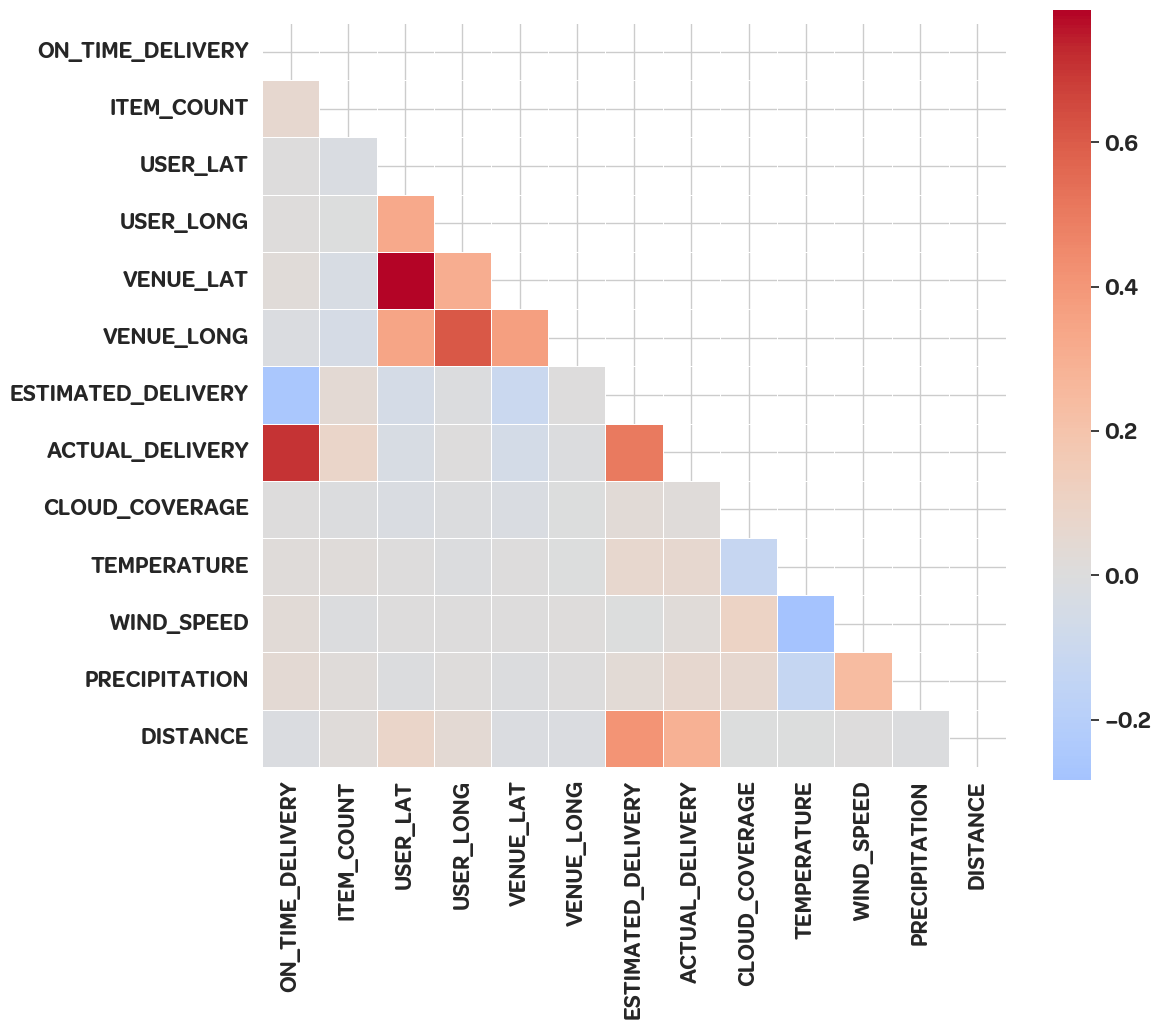

In [5]:
# Select relevant columns
# columns_to_correlate = ['ESTIMATED_DELIVERY', 'ACTUAL_DELIVERY', 'DISTANCE']

# Compute correlation matrix
correlation_matrix = df.iloc[:, 1:].corr()
# Print correlations
# print("Correlation Matrix:")
# print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
# Create a mask to only show the lower triangle of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=False, center=0, square=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title("Correlation Matrix: All features")

# Adjust the plot layout
# plt.subplots_adjust(left=0.22)
# plt.subplots_adjust(bottom=0.27)

plt.savefig('./results/eda/correlation_matrix_ALL.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()

No interesting strong correlations, only expected

## Customer satisfaction (CSAT Score) EDA

In [6]:
# Define a function to assign ratings based on ON_TIME_DELIVERY
def assign_rating(on_time_delivery):
    if on_time_delivery <= -10:
        return 5
    elif -10 < on_time_delivery <= 5:
        return 4
    elif 5 < on_time_delivery <= 15:
        return 3
    elif 15 < on_time_delivery <= 30:
        return 2
    else:
        return 1
    
# Assign ratings
df['CSAT'] = df['ON_TIME_DELIVERY'].apply(assign_rating)


Total Responses: 18706
Positive Responses (4 and 5 Stars): 14534
CSAT Score: 77.70%


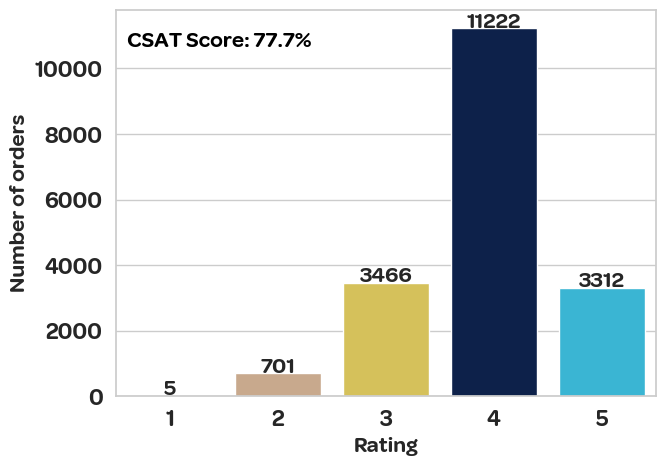

In [7]:
# Count the number of orders in each star rating
rating_counts = df['CSAT'].value_counts().sort_index()

# Plot the star ratings
plt.figure(figsize=(7, 5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, hue=rating_counts.index, palette=wolt_color_scheme, legend=False) #palette='viridis')

# Show the number of orders on the bars
for i, count in enumerate(rating_counts.values):
    plt.text(i, count - 100, str(count), ha='center', va='bottom', fontsize=16)

# Add labels and title
plt.xlabel("Rating", fontsize=16, weight='bold')
plt.ylabel("Number of orders", fontsize=16, weight='bold')


# CSAT Score Calculation
# Count the total number of responses
total_responses = len(df)
# Count the number of positive responses (4 and 5-star ratings)
positive_responses = df[df['CSAT'].isin([4, 5])].shape[0]
# Calculate the CSAT score
csat_score = (positive_responses / total_responses) * 100
# Print the results
print(f"Total Responses: {total_responses}")
print(f"Positive Responses (4 and 5 Stars): {positive_responses}")
print(f"CSAT Score: {csat_score:.2f}%")


# Add the CSAT score to the plot (top left corner)
plt.text(
    x=-0.4,  
    y=max(rating_counts.values) * 0.95,  
    s=f"CSAT Score: {csat_score:.1f}%",  
    fontsize=16,
    color="black",
    fontweight="bold",
)

# Display the plot
plt.tight_layout()
plt.savefig('./results/eda/CSAT_score.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()


## Average order quantity (AOQ) EDA

In [8]:
# Create AOQ 
def calculate_aoq(data, time_period):
    # Group by the specified time period (daily, weekly, monthly)
    grouped = data.resample(time_period, on='TIMESTAMP').agg(
        total_items=('ITEM_COUNT', 'sum'),
        total_orders=('ITEM_COUNT', 'count')
    )
    # Calculate AOQ
    grouped['AOQ'] = grouped['total_items'] / grouped['total_orders']
    return grouped

# Daily AOQ
daily_aoq = calculate_aoq(df, 'D')  # 'D' = daily

# Weekly AOQ
weekly_aoq = calculate_aoq(df, 'W')  # 'W' = weekly

# Monthly AOQ
monthly_aoq = calculate_aoq(df, 'ME')  # 'M' = monthly

# View Results
print("Daily AOQ:")
print(daily_aoq.head())

print("Weekly AOQ:")
print(weekly_aoq.head())

print("Monthly AOQ:")
print(monthly_aoq.head())

Daily AOQ:
            total_items  total_orders       AOQ
TIMESTAMP                                      
2020-08-01          839           299  2.806020
2020-08-02          995           328  3.033537
2020-08-03          616           226  2.725664
2020-08-04          565           228  2.478070
2020-08-05          704           256  2.750000
Weekly AOQ:
            total_items  total_orders       AOQ
TIMESTAMP                                      
2020-08-02         1834           627  2.925040
2020-08-09         5335          1944  2.744342
2020-08-16         5676          2108  2.692600
2020-08-23         5629          2114  2.662725
2020-08-30         5626          2078  2.707411
Monthly AOQ:
            total_items  total_orders       AOQ
TIMESTAMP                                      
2020-08-31        24606          9072  2.712302
2020-09-30        25680          9634  2.665559


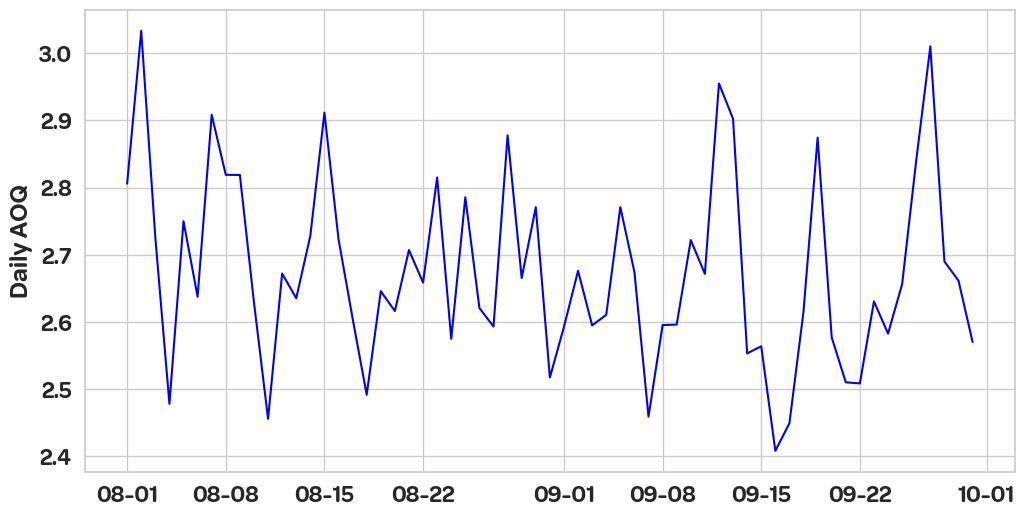

In [9]:
# Plot Daily AOQ
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(daily_aoq.index, daily_aoq['AOQ'], label='Daily AOQ', color='blue')
# Format the x-axis to not have dates overlap
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
ax.set_ylabel("Daily AOQ", weight='bold')

plt.savefig('./results/eda/AOQ_daily.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()

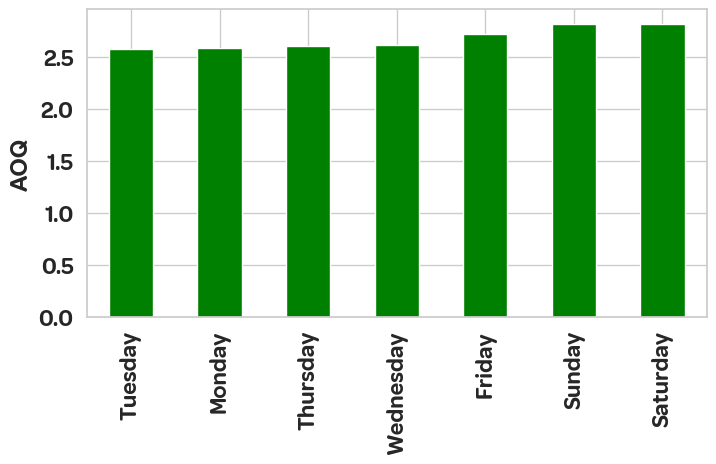

In [10]:
# Add a 'Day of Week' column
df['DAY'] = df['TIMESTAMP'].dt.day_name()
df['DAY_NUM'] = df['TIMESTAMP'].dt.dayofweek+1

# Group by day of the week
aoq_by_day = df.groupby('DAY')['ITEM_COUNT'].mean().sort_values()

sns.set_theme(style="whitegrid", font="Omnes", font_scale=1.5)
# Plot results
plt.figure(figsize=(8, 4))
aoq_by_day.plot(kind='bar', color='green',xlabel='')
plt.ylabel("AOQ", weight='bold')
plt.savefig('./results/eda/AOQ_by_day.png',bbox_inches='tight', transparent=True, dpi=600)
plt.show()

### Correlations of daily AOQ 

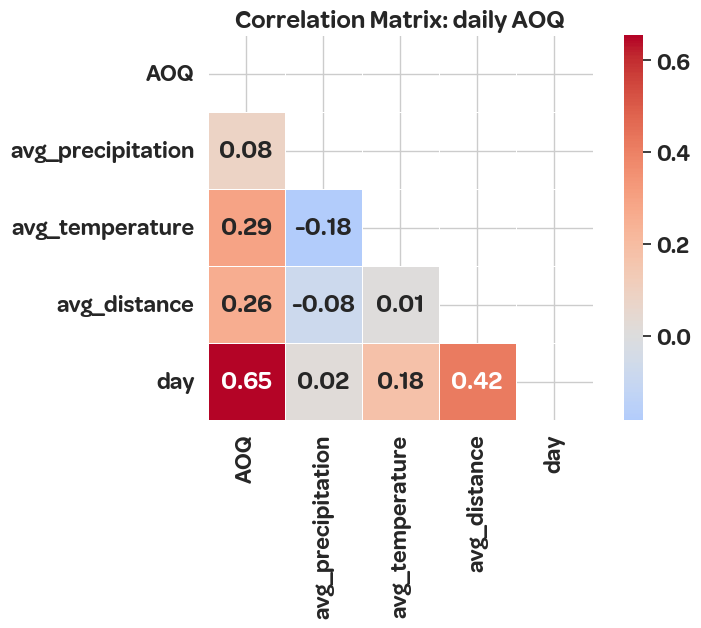

In [11]:
# Resample data to daily level, calculating averages for weather and AOQ for items
daily_weather_aoq = df.resample('D', on='TIMESTAMP').agg(
    total_items=('ITEM_COUNT', 'sum'),
    total_orders=('ITEM_COUNT', 'count'),
    avg_precipitation=('PRECIPITATION', 'mean'),
    avg_temperature=('TEMPERATURE', 'mean'),
    avg_distance=('DISTANCE', 'mean'),
    day = ('DAY_NUM', 'first')
)

# Calculate AOQ
daily_weather_aoq['AOQ'] = daily_weather_aoq['total_items'] / daily_weather_aoq['total_orders']

# Drop rows with missing data (if any)
daily_weather_aoq.dropna(inplace=True)

# Correlation analysis
correlation_matrix = daily_weather_aoq[['AOQ', 'avg_precipitation', 'avg_temperature', 'avg_distance', 'day']].corr()


# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 5))
# Create a mask to only show the lower triangle of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, center=0, square=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: daily AOQ")
plt.savefig('./results/eda/AOQ_correlations.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()

### Bigger orders later in the week, peaking in the weekends!

Qs: are there more orders? or the same/less but bigger? 

#### Autocorrelation function

Important when describing seasonality and trends in Time series analysis

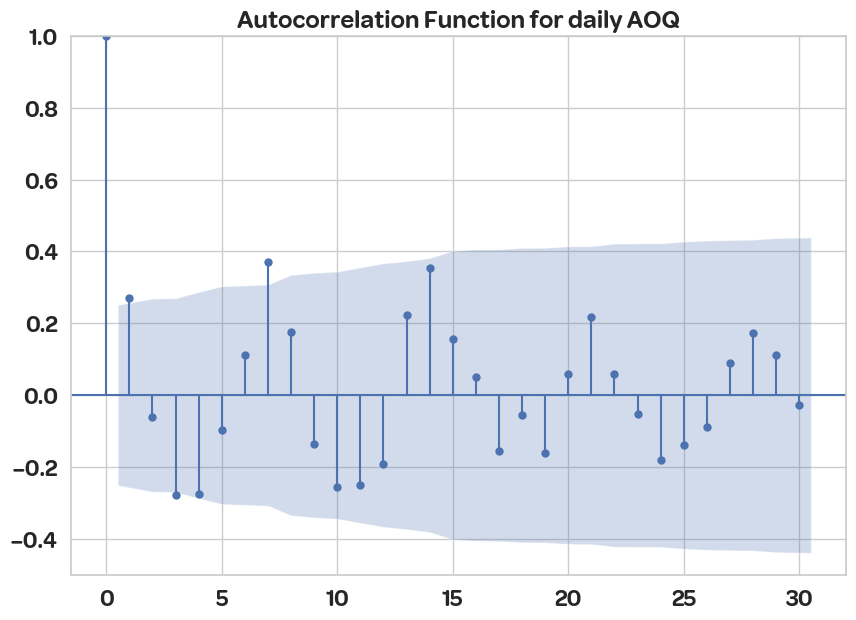

In [12]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Calculate the autocorrelation of the daily AOQ
# Plot the ACF
plt.rc("figure", figsize=(10, 7))
plot_acf(daily_weather_aoq['AOQ'], lags=30)
plt.title("Autocorrelation Function for daily AOQ",weight='bold')
plt.ylim(-0.5, 1.0)
plt.savefig('./results/eda/AOQ_daily_ACF.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()

plt.rc("figure", figsize=(8, 8))

Noticing a 7-day seasonality

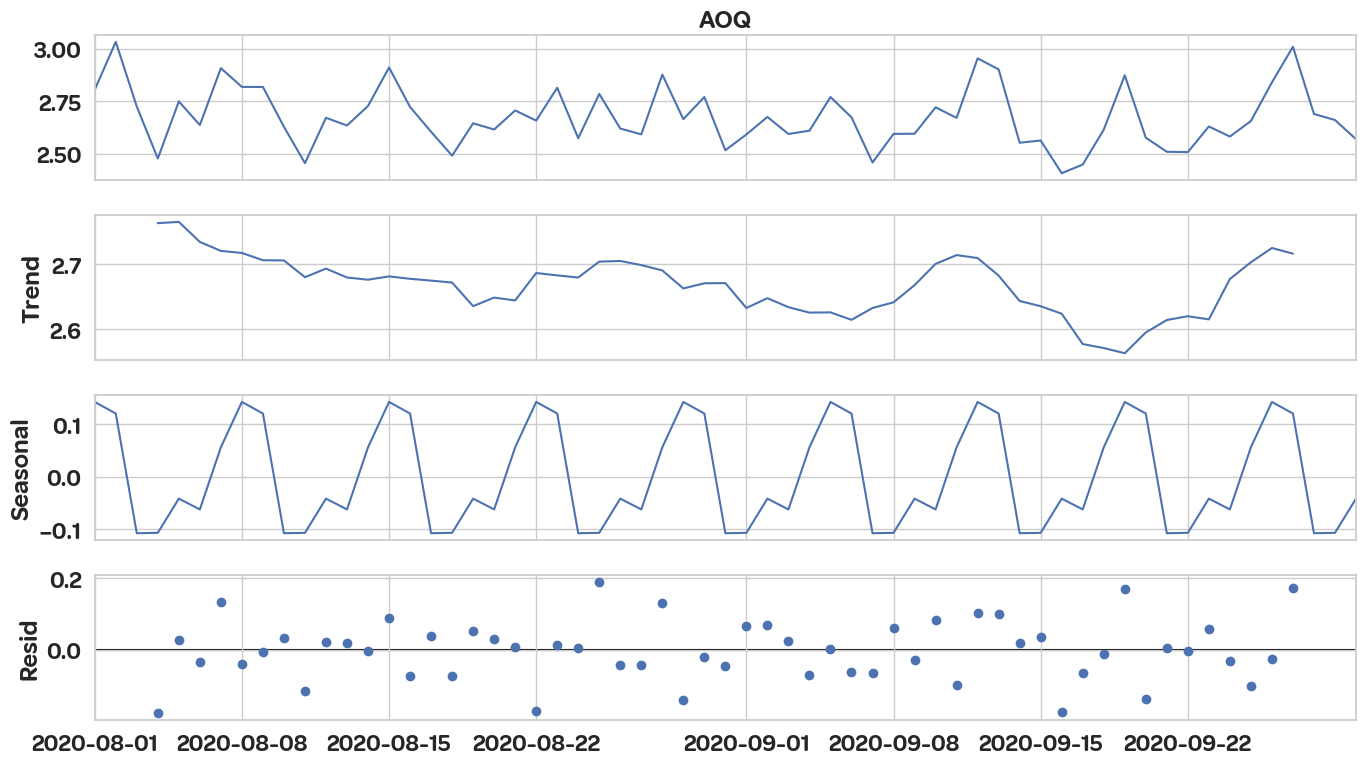

In [172]:
from statsmodels.tsa.seasonal import seasonal_decompose


# Perform seasonal decomposition of AOQ (daily data)
result = seasonal_decompose(daily_weather_aoq['AOQ'], model='additive', period=7)  # Assuming a yearly cycle

# sns.set_theme(style="whitegrid", font="Omnes", font_scale=1.5)
# Plot the decomposition

plt.rc("figure", figsize=(14, 8))
ax = result.plot()

# plt.xlabel("Date")
# ax.set_ylabel("Daily AOQ", weight='bold')


# plt.suptitle("Seasonal Decomposition of AOQ", fontsize=16)
plt.tight_layout()
plt.savefig('./results/eda/AOQ_seasonal_decomposition.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()

# return global figsize to default
plt.rc("figure", figsize=(8, 8))

Maybe the dataset is too small (only 60 days) to make accurate predictions...

## Delivery Time EDA

Distribution of delivery times (estimate, actual, difference between the two - we call it on_time_delivery)

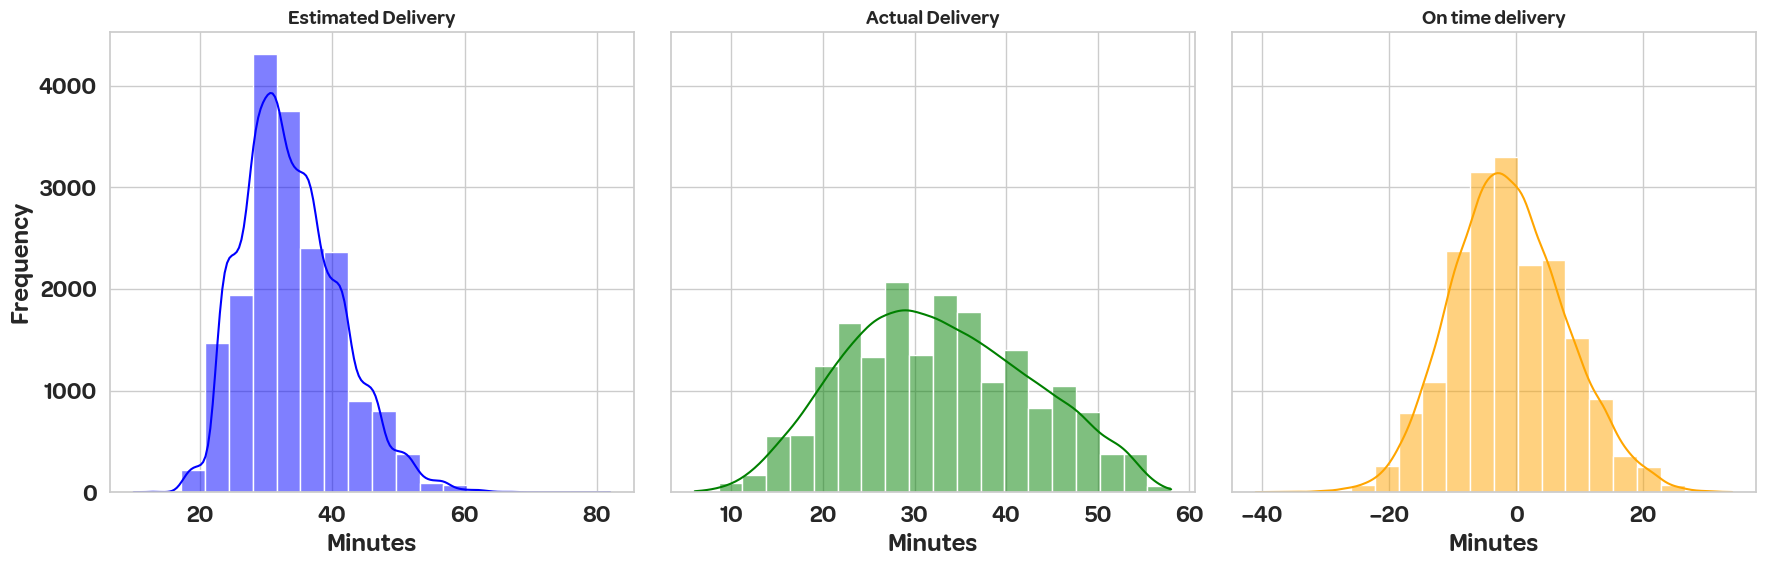

In [173]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# First plot: Histogram for ESTIMATED_DELIVERY
sns.histplot(data=df, x='ESTIMATED_DELIVERY',  bins=20, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Estimated Delivery', fontsize=14)
axes[0].set_xlabel('Minutes')
axes[0].set_ylabel('Frequency')

# Second plot: Histogram for ACTUAL_DELIVERY
sns.histplot(data=df, x='ACTUAL_DELIVERY',  bins=20, kde=True, color='green', ax=axes[1])
axes[1].set_title('Actual Delivery', fontsize=14)
axes[1].set_xlabel('Minutes')

# Third plot: Histogram for ON_TIME_DELIVERY
sns.histplot(data=df, x='ON_TIME_DELIVERY',  bins=20, kde=True, color='orange', ax=axes[2])
axes[2].set_title('On time delivery', fontsize=14)
axes[2].set_xlabel('Minutes')

# Adjust spacing between plots
plt.tight_layout()

# Show the plots
plt.savefig('./results/eda/delivery_histograms.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()

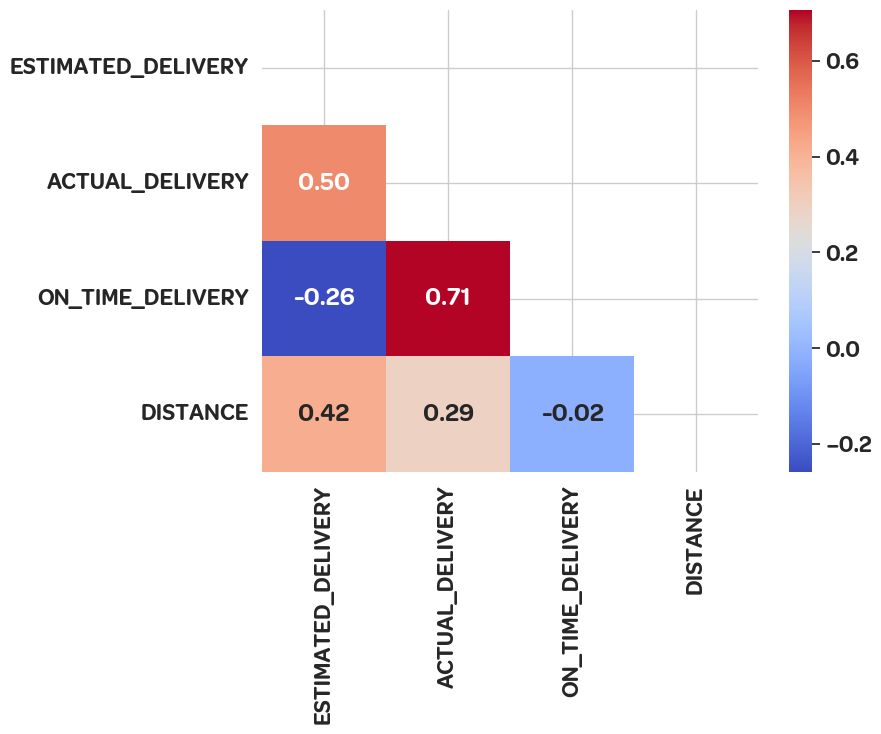

In [174]:
# Select relevant columns
columns_to_correlate = ['ESTIMATED_DELIVERY', 'ACTUAL_DELIVERY', 'ON_TIME_DELIVERY', 'DISTANCE']

# Compute correlation matrix
correlation_matrix = df[columns_to_correlate].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.savefig('./results/eda/delivery_correlation.png', bbox_inches='tight', transparent=True, dpi=600)

- Actual delivery correlates with estimate delivery (obviously)
- Estimated delivery should correlate with distance, but is not really the case
- Actual delivery correlates even less with distance

Is not necessarily that distance creates longer delivery times, it would be the case that long delivery times happen also for closeby orders

<Axes: xlabel='DISTANCE', ylabel='Count'>

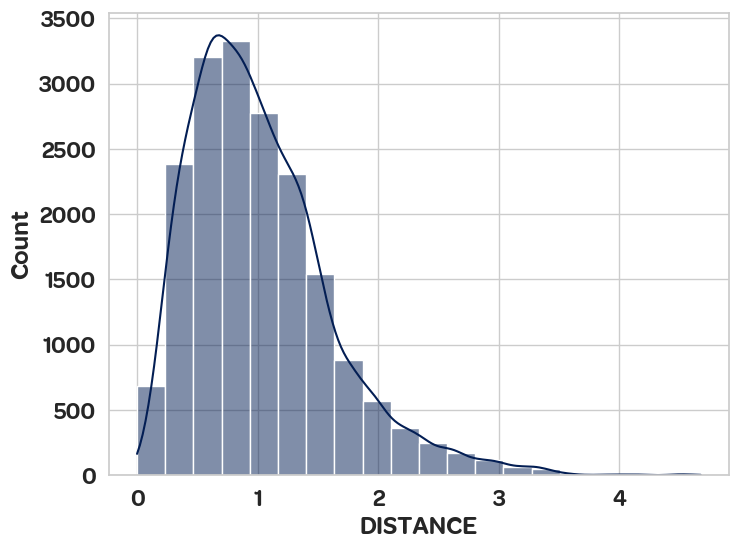

In [175]:
# Quick distribution plot of the distance
plt.figure(figsize=(8, 6))
sns.histplot(df['DISTANCE'], bins=20, kde=True, color=wolt_color_scheme[3])

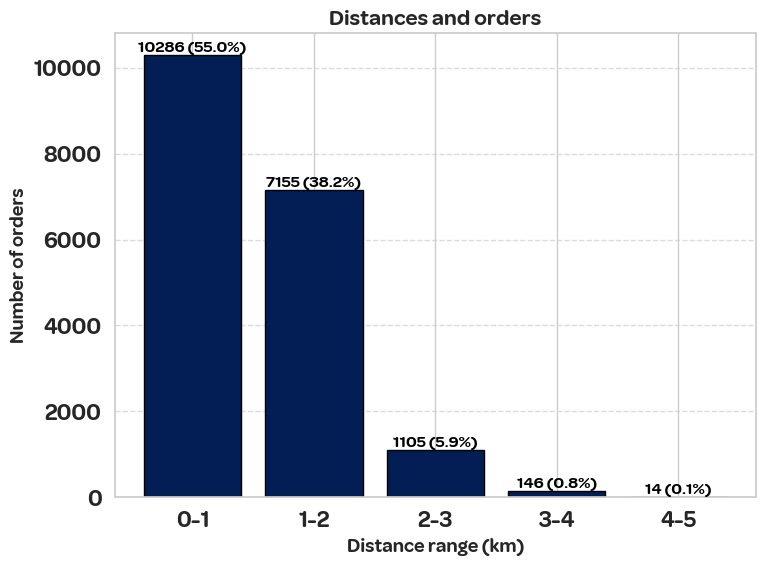

In [176]:
# Step 1: Bin the DISTANCE column
bins = [0, 1, 2, 3, 4, 5]  # Define bin edges
bin_labels = ['0-1', '1-2', '2-3', '3-4', '4-5']  # Labels for the bins
df['DISTANCE_BIN'] = pd.cut(df['DISTANCE'], bins=bins, labels=bin_labels, include_lowest=True)

# Step 2: Count the number of instances in each bin
bin_counts = df['DISTANCE_BIN'].value_counts(sort=False)  # Ensure bins are sorted
total_instances = bin_counts.sum()  # Total number of instances for percentage calculation

# Step 3: Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(bin_counts.index.astype(str), bin_counts.values, color=wolt_color_scheme[3], edgecolor='black')

# Step 4: Annotate bars with counts and percentages
for bar, count in zip(bars, bin_counts.values):
    percentage = (count / total_instances) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5,  # Adjust position
             f'{count} ({percentage:.1f}%)', ha='center', va='bottom', fontsize=12, color='black')

# Add titles and labels
plt.title('Distances and orders', fontsize=16)
plt.xlabel('Distance range (km)', fontsize=14)
plt.ylabel('Number of orders', fontsize=14)
plt.xticks(rotation=0)  # Keep bin labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.savefig('./results/eda/distance_bins.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()

### Impact on delivery times

## Weather

Weather is quite steady in this dataset (Aug-Sept)

Let's explore the precipitation

Based on: https://water.usgs.gov/edu/activity-howmuchrain-metric.html

- Light rain: Less than 0.5 mm per hour.
- Moderate rain: Greater than 0.5 mm per hour, but less than 4.0 mm per hour.
- Heavy rain: Greater than 4 mm per hour, but less than 8 mm per hour.
- Very heavy rain: Greater than 8 mm per hour.

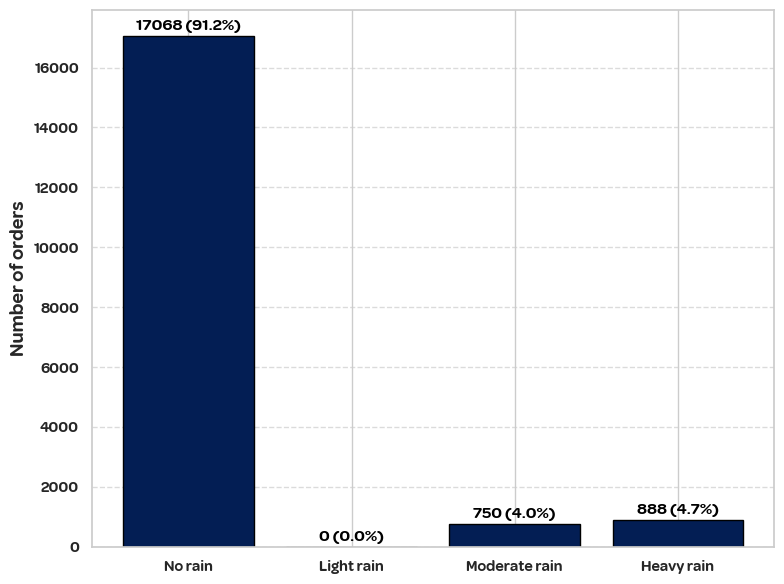

In [177]:
# Step 1: Bin the PRECIPITATION
bins = [0.0, 0.001, 0.5, 4.0, max(df['PRECIPITATION'])]  # Define bin edges
bin_labels = ['No rain', 'Light rain', 'Moderate rain', 'Heavy rain']  # Labels for the bins
df['PRECIPITATION_BIN'] = pd.cut(df['PRECIPITATION'], bins=bins, labels=bin_labels, include_lowest=True)

# Step 2: Count the number of instances in each bin
bin_counts = df['PRECIPITATION_BIN'].value_counts(sort=False)  # Ensure bins are sorted
total_instances = bin_counts.sum()  # Total number of instances for percentage calculation


sns.set_theme(style="whitegrid", font="Omnes")
# Step 3: Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(bin_counts.index.astype(str), bin_counts.values, color=wolt_color_scheme[3], edgecolor='black')

# Step 4: Annotate bars with counts and percentages
for bar, count in zip(bars, bin_counts.values):
    percentage = (count / total_instances) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 100,  # Adjust position
             f'{count} ({percentage:.1f}%)', ha='center', va='bottom', fontsize=12, color='black')

# Add titles and labels
# plt.title('Precipitation', fontsize=16)
# plt.xlabel('Rainfall amount', fontsize=14)
plt.ylabel('Number of orders', fontsize=14)
plt.xticks(rotation=0)  # Keep bin labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.savefig('./results/eda/precipitation_bins.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()

#### Impact of precipitaion on ON_TIME_DELIVERY

C:\Users\gabip\AppData\Local\Temp\ipykernel_1352\1108513752.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='PRECIPITATION_BIN', y='ON_TIME_DELIVERY', palette=wolt_color_scheme)
C:\Users\gabip\AppData\Local\Temp\ipykernel_1352\1108513752.py:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax = sns.barplot(data=df, x='PRECIPITATION_BIN', y='ON_TIME_DELIVERY', palette=wolt_color_scheme)


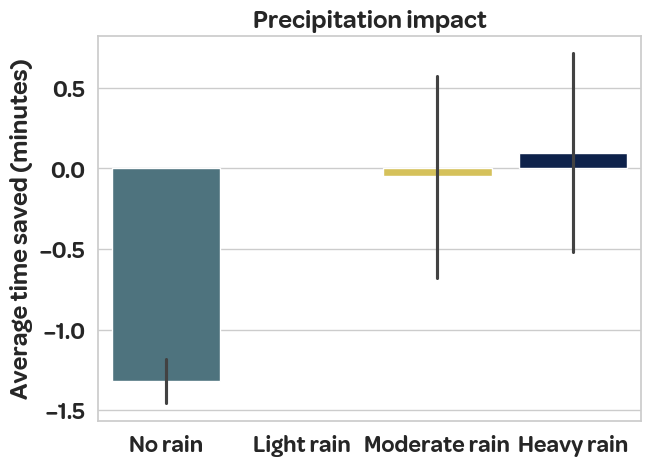

In [191]:
plt.figure(figsize=(7, 5))

sns.set_theme(style="whitegrid", font="Omnes", font_scale=1.5)

# ignore warnings
ax = sns.barplot(data=df, x='PRECIPITATION_BIN', y='ON_TIME_DELIVERY', palette=wolt_color_scheme)
ax.set(xlabel=None)
plt.ylabel('Average time saved (minutes)', weight='bold')
plt.title('Precipitation impact', weight='bold')

plt.savefig('./results/eda/delivery_precipitation_impact.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()

#### Impact of WEEKEND on Delivery Time

In [179]:
df['WEEKEND'] = df['DAY'].apply(lambda x: True if x in ['Saturday', 'Sunday'] else False)

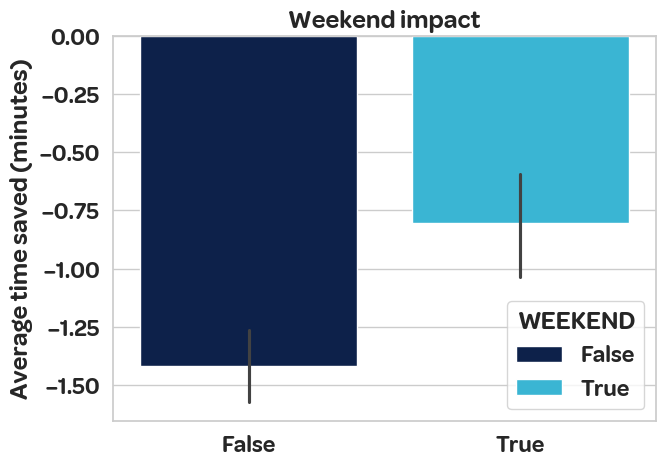

In [180]:
plt.figure(figsize=(7, 5))

sns.set_theme(style="whitegrid", font="Omnes", font_scale=1.5)
ax = sns.barplot(data=df, x='WEEKEND', y='ON_TIME_DELIVERY', hue='WEEKEND', palette=wolt_color_scheme[3:5])
ax.set(xlabel=None)
plt.ylabel('Average time saved (minutes)', weight='bold')

# Adjust the plot layout
# plt.subplots_adjust(left=0.15)

plt.title('Weekend impact', weight='bold')

plt.savefig('./results/eda/delivery_weekend_impact.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()

#### Rush-hour impact 

Typical for Helsinki: ma-pe 7:00-9:00, 15:00-17:00, can be computed from TIMESTAMP

Source: https://www.tomtom.com/traffic-index/helsinki-traffic/

In [181]:
# add hour to dataset
df['HOUR'] = pd.to_datetime(df['TIMESTAMP']).dt.hour

# Rush hours defined as 7:00-9:00 and 15:00-17:00 only on weekdays!
def classify_rush_hour(row):
    if row['WEEKEND'] == False:
        if 7 <= row['HOUR'] <= 8 or 15 <= row['HOUR'] <= 16:
            return True
    return False

df['RUSH_HOUR'] = df.apply(classify_rush_hour, axis=1)

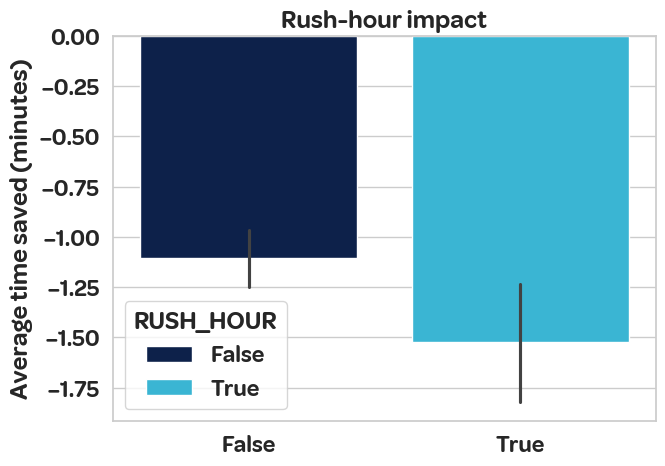

In [182]:
plt.figure(figsize=(7, 5))

sns.set_theme(style="whitegrid", font="Omnes", font_scale=1.5)
ax = sns.barplot(data=df, x='RUSH_HOUR', y='ON_TIME_DELIVERY', hue='RUSH_HOUR', palette=wolt_color_scheme[3:5])
ax.set(xlabel=None)
plt.ylabel('Average time saved (minutes)', weight='bold')

# 

# Extend the plot to the left
# plt.subplots_adjust(left=0.15)

plt.title('Rush-hour impact', weight='bold')

plt.savefig('./results/eda/delivery_rushhour_impact.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()

#### Combined factors

Precipitation during rush-hours (but there are a few days of precipitation)

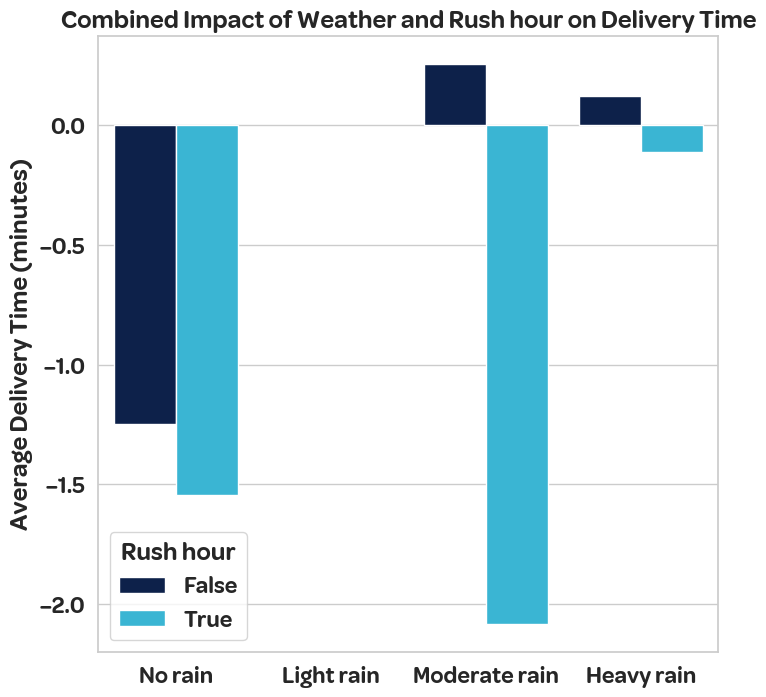

In [183]:
combined_analysis = df.groupby(['PRECIPITATION_BIN', 'RUSH_HOUR'],observed=False)['ON_TIME_DELIVERY'].mean().reset_index()

sns.barplot(data=combined_analysis, x='PRECIPITATION_BIN', y='ON_TIME_DELIVERY', hue='RUSH_HOUR', palette=wolt_color_scheme[3:5])
plt.title('Combined Impact of Weather and Rush hour on Delivery Time')
plt.ylabel('Average Delivery Time (minutes)')
plt.xlabel('')
plt.legend(title='Rush hour')
plt.savefig('./results/eda/delivery_weather_and_rushhour_impact.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()

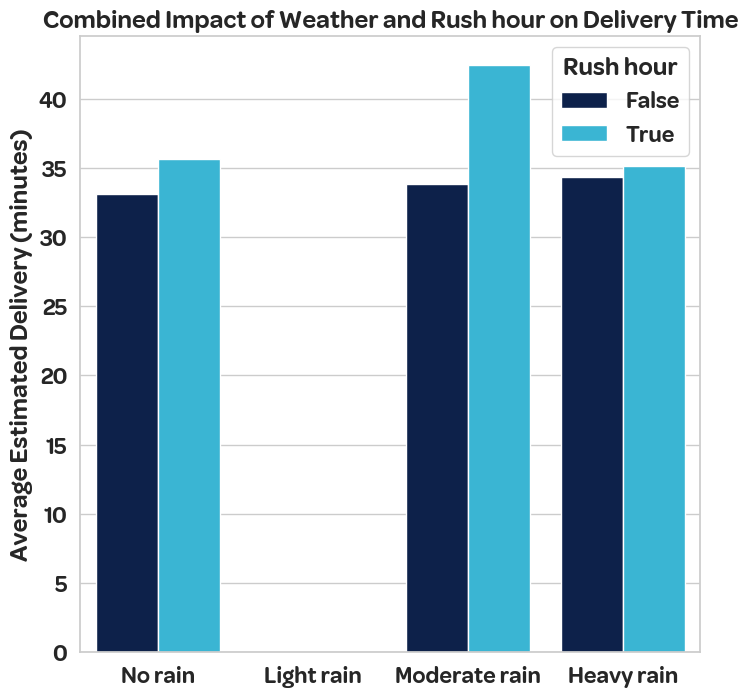

In [184]:
combined_analysis = df.groupby(['PRECIPITATION_BIN', 'RUSH_HOUR'],observed=False)['ESTIMATED_DELIVERY'].mean().reset_index()

sns.barplot(data=combined_analysis, x='PRECIPITATION_BIN', y='ESTIMATED_DELIVERY', hue='RUSH_HOUR', palette=wolt_color_scheme[3:5])
plt.title('Combined Impact of Weather and Rush hour on Delivery Time')
plt.ylabel('Average Estimated Delivery (minutes)')
plt.xlabel('')
plt.legend(title='Rush hour')
# plt.savefig('./results/eda/delivery_weather_and_rushhour_impact.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()

- The users get a larger time estimate when there is bad weather, and it is rush hour
- But the delivery couriers perform well under those circumstances

### Quick view on other order distributions, before modeling

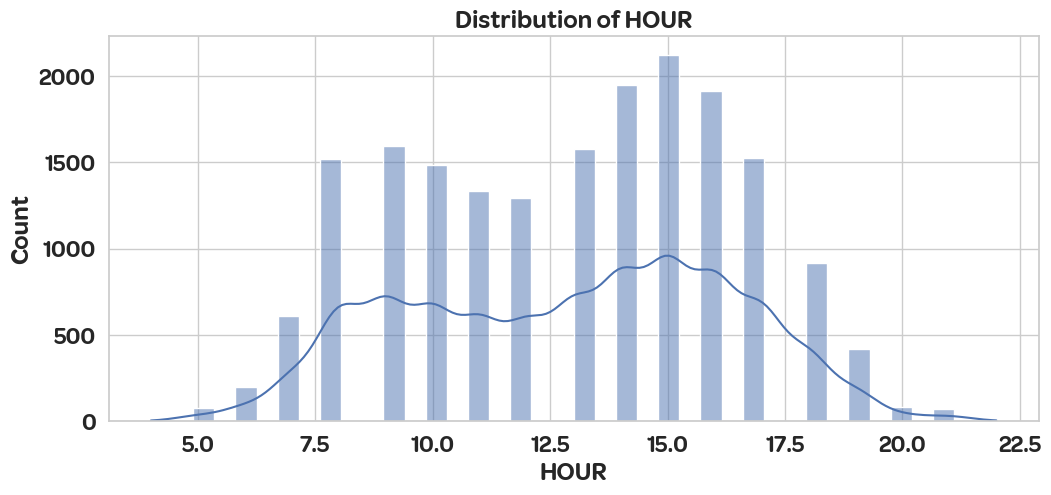

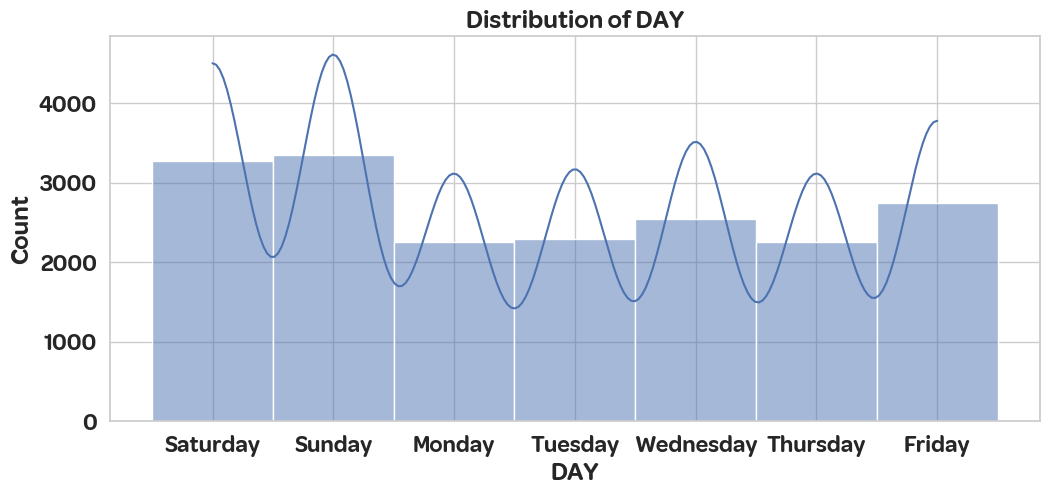

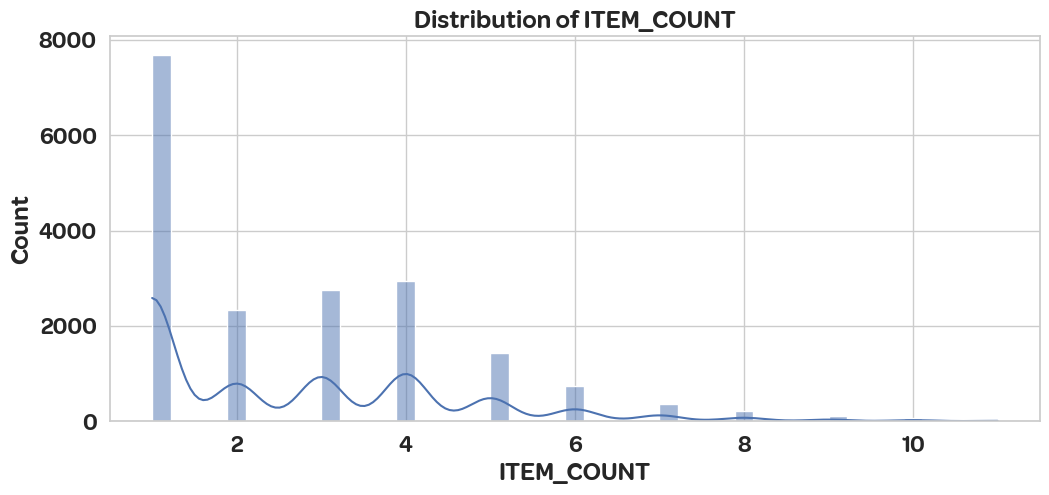

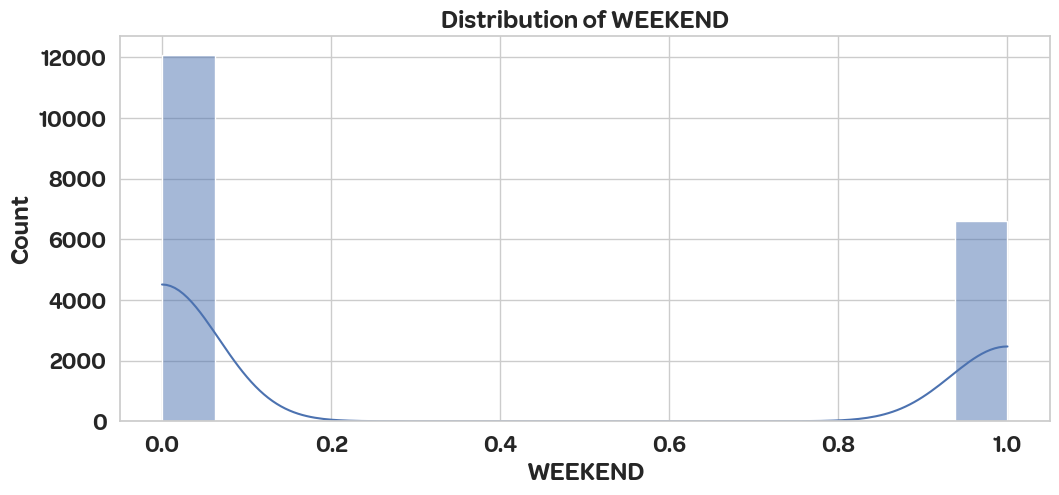

In [185]:
for col in ['HOUR', 'DAY', 'ITEM_COUNT', 'WEEKEND']:
    plt.figure(figsize=(12, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()